# Yelp Business Stars’ Rating Prediction

**Big Data | Data Cleaning | Data Preporocessing | Text Processing | TF-IDF vectorization |  Regression | Classification | Model Evaluation | Model Performance Comparison**


 Tradition AI Models : KNN | SVM | Logistic Regression | Multinomial Naive Bayes | Linear Regression 
 
 Deep Learning Models : Neural Network ( Regression & Classification )
 
 ## Mini Project 1
 Mansi Patel
 
 February 13, 2019
 
 Prof : Haiquen Chen 
 
 
Class : CSC 215-01

#Problem statement
Predicting the review stars from 1-5 star ratings based on the review given by the user.

Machine Learning project aims

*  learn text vectorization (IF-IDF)
* big data handling & preprocess the data
*  merging two big datasets
*  treat problem as rgression and classification, observe it
* Apply and compare tradition AI models with Deep Learning Nueral Network

Tools and Libraries used
* sklearn
*TensorFlow
*


#Dataset
https://www.yelp.com/dataset/download

# Load dataset
The data containing json files was converted to a compatible file to load on pandas’ data frame.Used business. json and review.json files to understand the dataset.

In [0]:
import os
import json
import csv
import pandas as pd
import numpy as np
import collections
from scipy.stats import zscore
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', -1)

In [0]:
# Creating Business Dataframe
business_df= pd.read_csv('business.tsv', delimiter ="\t")

In [0]:
# Creating Review Dataframe
review_df= pd.read_csv('review_stars.tsv', delimiter ="\t")

In [0]:
business_df.head()

,business_id,categories,stars,review_count
0,1SWheh84yJXfytovILXOAQ,"Golf, Active Life",3.0,5
1,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported Food, Food, Chinese, Ethnic Food, Seafood",2.5,128
2,gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",4.0,170
3,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",5.0,3
4,HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Services, Kitchen & Bath, Home & Garden, Water Heater Installation/Repair",4.0,4


In [0]:
review_df.head()

,business_id,stars,text
0,ujmEBvifdJM6h6RLv4wQIg,1.0,b'Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.'
1,NZnhc2sEQy3RmzKTZnqtwQ,5.0,"b""I *adore* Travis at the Hard Rock's new Kelly Cardenas Salon! I'm always a fan of a great blowout and no stranger to the chains that offer this service; however, Travis has taken the flawless blowout to a whole new level! \n\nTravis's greets you with his perfectly green swoosh in his otherwise perfectly styled black hair and a Vegas-worthy rockstar outfit. Next comes the most relaxing and incredible shampoo -- where you get a full head message that could cure even the very worst migraine in minutes --- and the scented shampoo room. Travis has freakishly strong fingers (in a good way) and use the perfect amount of pressure. That was superb! Then starts the glorious blowout... where not one, not two, but THREE people were involved in doing the best round-brush action my hair has ever seen. The team of stylists clearly gets along extremely well, as it's evident from the way they talk to and help one another that it's really genuine and not some corporate requirement. It was so much fun to be there! \n\nNext Travis started with the flat iron. The way he flipped his wrist to get volume all around without over-doing it and making me look like a Texas pagent girl was admirable. It's also worth noting that he didn't fry my hair -- something that I've had happen before with less skilled stylists. At the end of the blowout & style my hair was perfectly bouncey and looked terrific. The only thing better? That this awesome blowout lasted for days! \n\nTravis, I will see you every single time I'm out in Vegas. You make me feel beauuuutiful!"""
2,WTqjgwHlXbSFevF32_DJVw,5.0,"b""I have to say that this office really has it together, they are so organized and friendly! Dr. J. Phillipp is a great dentist, very friendly and professional. The dental assistants that helped in my procedure were amazing, Jewel and Bailey helped me to feel comfortable! I don't have dental insurance, but they have this insurance through their office you can purchase for $80 something a year and this gave me 25% off all of my dental work, plus they helped me get signed up for care credit which I knew nothing about before this visit! I highly recommend this office for the nice synergy the whole office has!"""
3,ikCg8xy5JIg_NGPx-MSIDA,5.0,"b""Went in for a lunch. Steak sandwich was delicious, and the Caesar salad had an absolutely delicious dressing, with a perfect amount of dressing, and distributed perfectly across each leaf. I know I'm going on about the salad ... But it was perfect.\n\nDrink prices were pretty good.\n\nThe Server, Dawn, was friendly and accommodating. Very happy with her.\n\nIn summation, a great pub experience. Would go again!"""
4,b1b1eb3uo-w561D0ZfCEiQ,1.0,"b'Today was my second out of three sessions I had paid for. Although my first session went well, I could tell Meredith had a particular enjoyment for her male clients over her female. However, I returned because she did my teeth fine and I was pleased with the results. When I went in today, I was in the whitening room with three other gentlemen. My appointment started out well, although, being a person who is in the service industry, I always attend to my female clientele first when a couple arrives. Unbothered by those signs, I waited my turn. She checked on me once after my original 30 minute timer to ask if I was ok. She attended my boyfriend on numerous occasions, as well as the other men, and would exit the room without even asking me or looking to see if I had any irritation. Half way through, another woman had showed up who she was explaining the deals to in the lobby. While she admits timers must be reset half way through the process, she reset my boyfriends, left, rest the gentleman furthest away 

In [0]:
# Printing Shapes and some information for both the dataframes 
print(review_df.shape)    
print(business_df.shape)
print(review_df.stars.value_counts())

(6685900, 3)
(192609, 4)
5.0    2933082
4.0    1468985
1.0    1002159
3.0    739280 
2.0    542394 
Name: stars, dtype: int64


Grouped the multiple reviews on bussiness_id to get all reviews given by the user into one text.

In [0]:
df_ready_for_sklearn.shape  # Total - 192606

(192606, 2)

Merged the datasets with on BusinessID and got the final dataset shape as below

In [0]:
df_merge.shape # (192606, 5)

(192606, 5)

##    Data Pre-Processing/ Cleaning

* Dropped the rows with categories that have null values
*Filtered the data frame more by removing rows with business Ids having review count less than
a certain threshold
* Cleaned the reviews text data by removing stop words, punctuations and white spaces.
* Used TF-IDF vectorization for Feature Extraction and used its parameters 
* Performed label encoding on the “stars” column (Output Feature)
*Normalized the “ Review_count “ Column to make it comparable with min-max normalization

The dataframe is as below

In [0]:
df_clean1 = df
print (df.shape)
print (df.dtypes)
df.head()

(40976, 5)
business_id     object 
categories      object 
stars           float64
review_count    int64  
all_reviews     object 
dtype: object


business_id  \
0  QXAEGFB4oINsVuTFxEYKFQ   
1  gnKjwL_1w79qoiV3IC_xQQ   
2  PZ-LZzSlhSe9utkQYU8pFg   
3  dFMxzHygTy6F873843dHAA   
4  KWywu2tTEPWmR9JnBc0WyQ   

                                                                                 categories  \
0  Specialty Food, Restaurants, Dim Sum, Imported Food, Food, Chinese, Ethnic Food, Seafood   
1  Sushi Bars, Restaurants, Japanese                                                          
2  Restaurants, Italian                                                                       
3  Arcades, Arts & Entertainment                                                              
4  Nightlife, Arts & Entertainment, Bars, Strip Clubs, Adult Entertainment, Dance Clubs       

   stars  review_count  \
0  2.5    128            
1  4.0    170            
2  4.0    40             
3  4.5    38             
4  4.0    107            

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [0]:
# Feature Extraction

import sklearn.feature_extraction.text as sk_text
Tfidf_vectorizer = sk_text.TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1), min_df = .05 , max_df = .85)

In [0]:
matrix = Tfidf_vectorizer.fit_transform(df_clean1['all_reviews'])

In [0]:
tfidf_data = matrix.toarray()

In [0]:
tfidf_data

array([[0.        , 0.        , 0.01196282, ..., 0.01173804, 0.        ,
        0.00259588],
       [0.00541855, 0.00482508, 0.00859305, ..., 0.00790462, 0.        ,
        0.00559396],
       [0.        , 0.00743404, 0.        , ..., 0.00974297, 0.        ,
        0.02585599],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0109784 , 0.01047426, 0.00683971, ..., 0.00183033, 0.00106512,
        0.00323823],
       [0.02137078, 0.00951506, 0.00847275, ..., 0.        , 0.        ,
        0.        ]])

In [0]:
print(Tfidf_vectorizer.get_feature_names())

['100', '12', '15', '20', '25', '30', '35', '40', '45', '50', 'able', 'absolutely', 'accommodating', 'actual', 'add', 'added', 'addition', 'additional', 'affordable', 'afternoon', 'ago', 'ahead', 'air', 'airport', 'ambiance', 'american', 'answer', 'apparently', 'appetizer', 'appetizers', 'apple', 'appointment', 'appreciate', 'arent', 'arrived', 'asian', 'asking', 'ate', 'atmosphere', 'attention', 'attentive', 'attitude', 'authentic', 'available', 'average', 'avocado', 'avoid', 'awful', 'baby', 'bacon', 'bag', 'baked', 'bar', 'barely', 'bartender', 'bartenders', 'based', 'basic', 'basically', 'bathroom', 'bbq', 'bean', 'beans', 'beat', 'beautiful', 'bed', 'beef', 'beer', 'beers', 'believe', 'belly', 'bigger', 'birthday', 'bite', 'black', 'bland', 'blue', 'book', 'booked', 'bottle', 'bought', 'bowl', 'box', 'boy', 'boyfriend', 'bread', 'break', 'breakfast', 'bring', 'brisket', 'broth', 'brought', 'brown', 'brunch', 'bucks', 'buffet', 'building', 'bun', 'bunch', 'burger', 'burgers', 'burr

# Splitting the data 

In [0]:
from sklearn.cross_validation import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(final_input_features, df_clean1['stars'], test_size=0.2, random_state=42)

In [0]:
#train-test data shapes
print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)

(32780, 1001)
(32780,)
(8196, 1001)
(8196,)


In [0]:
#Label Encoding the output/Target feature

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_clean1['stars_encoded'] = le.fit_transform(df_clean1['stars'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Regression Model

## Linear Regression

In [0]:
#checkig the errors for regression
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y_test1, y_predict_lin_model1))
print('R2 score: %.2f' % r2_score(y_test1, y_predict_lin_model1))
print("RMSE: %.2f"
      % np.sqrt(mean_squared_error(y_test1, y_predict_lin_model1)))
score_reg =  np.sqrt(mean_squared_error(y_test1, y_predict_lin_model1))

Mean squared error: 0.10
R2 score: 0.82
RMSE: 0.32


Populating the interactive namespace from numpy and matplotlib


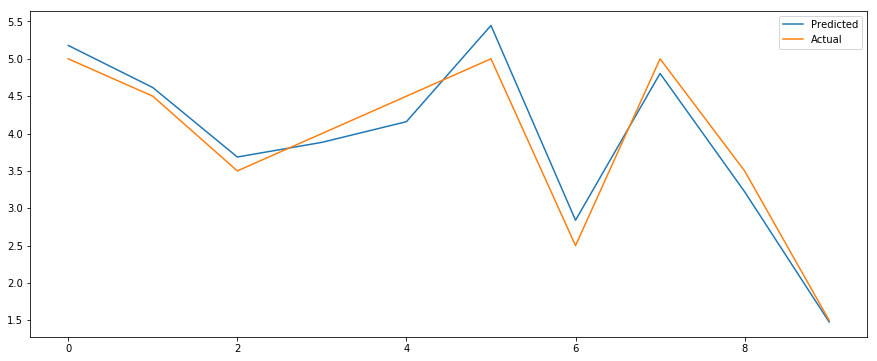

In [0]:
#ploting the predicting and actual values
%pylab inline 
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(y_predict_lin_model1[:10],label = 'Predicted')
plt.plot(y_test1[:10].values, label = 'Actual')

plt.legend()
plt.show()

##Neural Network Using Tensorflow

Used earlystopping to prevent overfitting the model and used checkpointer to save the best model ran in the loop several time to jump out of the local mininum.

Applied paramter tuning by changing following:

* Activation function : relu, sigmoid,tanh
* Number of Dense Layers
*Number of Neurons in each layer
* Learning rate for Activatio
*Optimizer


In [0]:
x1 = final_input_features
y1 = df_clean1['stars']
print (x1.shape,y1.shape)
# Split into train/test - 80/20
x_train2, x_test2, y_train2, y_test2 = train_test_split (x1, y1, test_size=0.20, random_state=45)

(40976, 1001) (40976,)


In [0]:
#loading the best saved model
from keras.models import load_model
model1 = load_model(os.path.join(save_path,"best_regression.hdf5"))

# Predict and measure RMSE
pred4 = model1.predict(x_test2)
scoref = np.sqrt(metrics.mean_squared_error(pred4,y_test2))
print("Score (RMSE): {}".format(scoref))


Score (RMSE): 0.25554479688021825


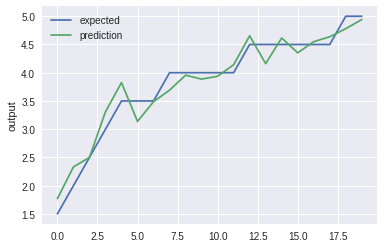

In [0]:
chart_regression(pred4[0:20].flatten(),np.array(y_test2[0:20]))

Populating the interactive namespace from numpy and matplotlib


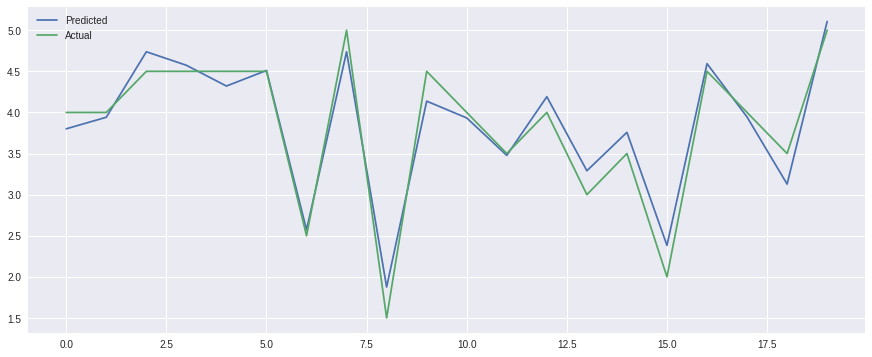

In [0]:
#ploting the predicting and actual values
%pylab inline 
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(pred_reg[0:20],label = 'Predicted')
plt.plot(y_test2[0:20].values, label = 'Actual')
#plt.plot(y_predict_lin_model1[:10],label = 'Previous Predicted')
#plt.plot(y_test1[:10].values, label = 'Previous Actual')

plt.legend()
plt.show()

##Comparison

Text(0, 0.5, 'RMSE')

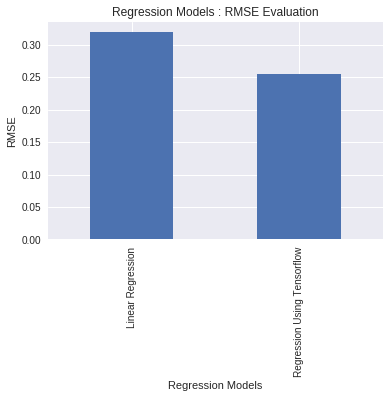

In [0]:
my_plot2 = df_reg1.plot(kind='bar',legend=None,title="Regression Models : RMSE Evaluation",)
my_plot2.set_xlabel("Regression Models")
my_plot2.set_ylabel("RMSE")

#Classification Model

##Logistic Regression

In [0]:
# label Encoded star
x_train, x_test, y_train, y_test = train_test_split(final_input_features, df_clean1['stars_encoded'], test_size=0.2, random_state=42)

In [0]:
#checking the train and test data size
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32780, 1001)
(32780,)
(8196, 1001)
(8196,)


In [0]:
f1_score(y_test,y_pred_log_reg,average='micro')

0.5126891166422645

In [0]:
from sklearn.metrics import accuracy_score
print("accuracy: %.2f"
      % accuracy_score(y_test, y_pred_log_reg))

accuracy: 0.51


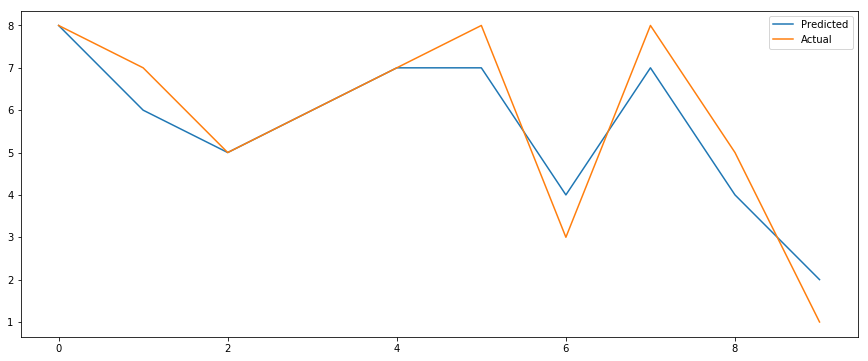

In [0]:
#ploting the predicting and actual values
plt.plot(y_pred_log_reg[:10],label = 'Predicted')
plt.plot(y_test[:10].values, label = 'Actual')

plt.legend()
plt.show()

##SVM

In [0]:
f1_score(y_test2,y_pred_svm, average ='micro')

0.264

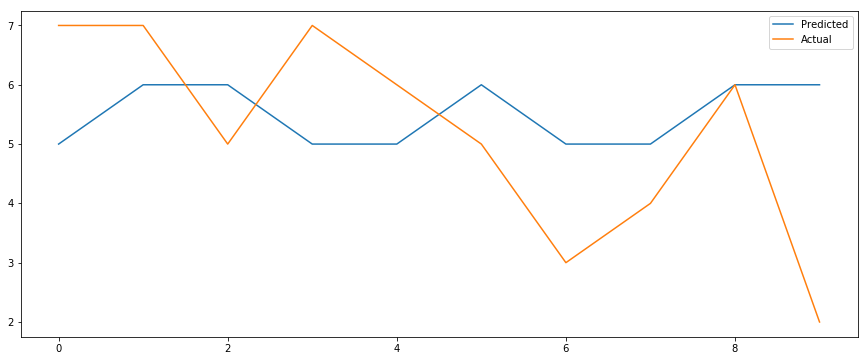

In [0]:
#ploting the predicting and actual values
plt.plot(y_pred_svm[10:20],label = 'Predicted')
plt.plot(y_test2[10:20].values, label = 'Actual')

plt.legend()
plt.show()

##KNN

In [0]:
f1_score(y_test2,y_pred_knn,average='micro')

0.2515

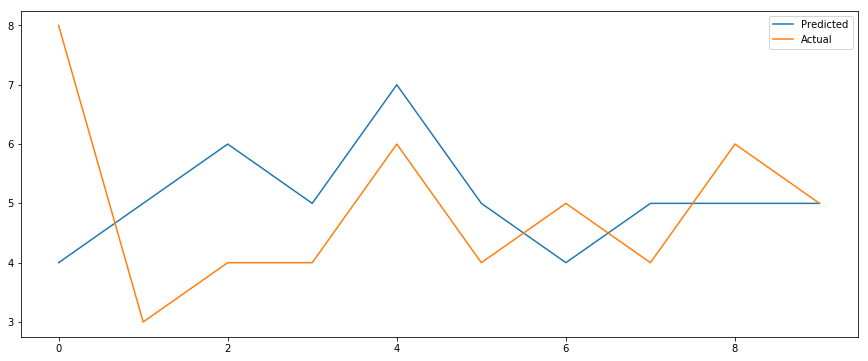

In [0]:
#ploting the predicting and actual values
plt.plot(y_pred_knn[:10],label = 'Predicted')
plt.plot(y_test2[:10].values, label = 'Actual')

plt.legend()
plt.show()

##MNB

In [0]:
f1_score(y_test3,y_pred_mnb, average ='micro')

0.3616398243045388

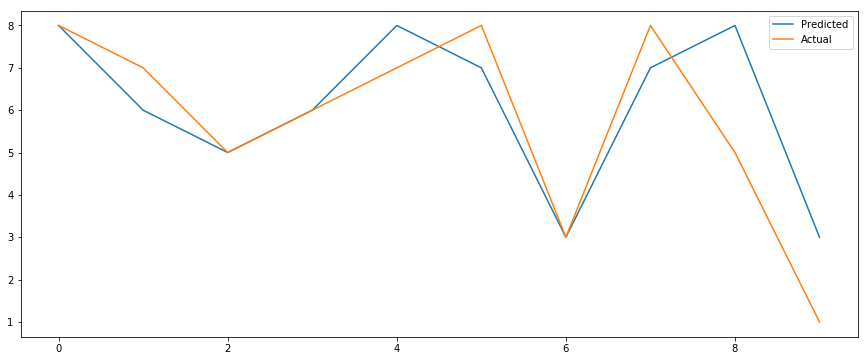

In [0]:
#ploting the predicting and actual values
plt.plot(y_pred_mnb[:10],label = 'Predicted')
plt.plot(y_test3[:10].values, label = 'Actual')

plt.legend()
plt.show()

#Boost up Performances
Output feature - review ratings categorised in 3 category high, low and medium to boost the performance of the above applied model and it significantly boosts the performance

##Linear Regression

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

Using TensorFlow backend.


In [0]:
#predict
y_pred_knn2=knn2.predict(x_test4)
print("New F-score",f1_score(y_test4, y_pred_knn2,average='micro'))
print("Previous F-score",f1_score(y_test2,y_pred_knn,average='micro'))

New F-score 0.58
Previous F-score 0.2515


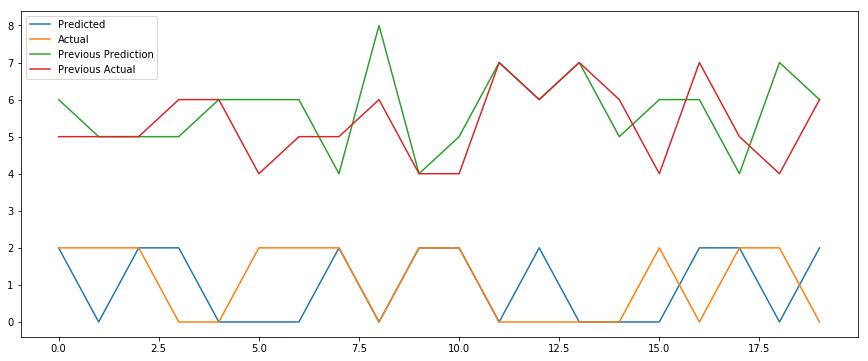

In [0]:
#ploting the comparison of the previous and new predicted and actual values
plt.plot(y_pred_knn2[40:60],label = 'Predicted')
plt.plot(y_test4[40:60].values, label = 'Actual')
plt.plot(y_pred_knn[40:60], label = 'Previous Prediction')
plt.plot(y_test2[40:60].values, label = 'Previous Actual')
plt.legend()
plt.show()

##Logistic Regression

In [0]:
print ("Previous Fscore",f1_score(y_test,y_pred_log_reg,average='micro'))
print ("New Fscore",f1_score(y_test5, y_pred_log2,average='micro'))

Previous Fscore 0.5126891166422645
New Fscore 0.8550512445095169


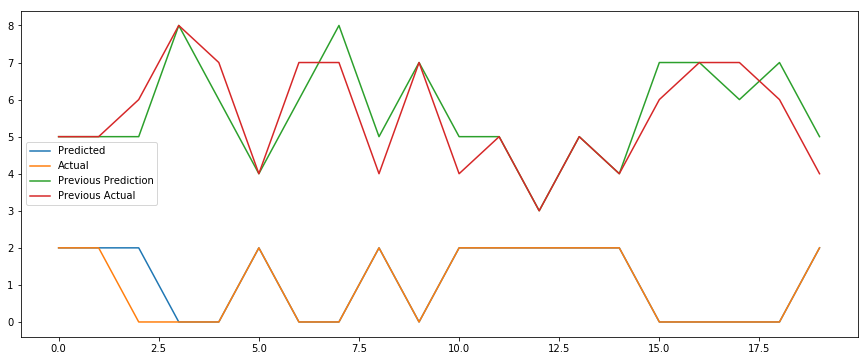

In [0]:
#ploting the comparison of the previous and new predicted and actual values
plt.plot(y_pred_log2[40:60],label = 'Predicted')
plt.plot(y_test5[40:60].values, label = 'Actual')
plt.plot(y_pred_log_reg[40:60], label = 'Previous Prediction')
plt.plot(y_test[40:60].values, label = 'Previous Actual')
plt.legend()
plt.show()

##SVM

In [0]:
print(" New f1 score ", f1_score(y_test4, y_pred_svm2,average='micro'))
print (" Previous f1 score", f1_score(y_test2,y_pred_svm, average ='micro'))

 New f1 score  0.6365
 Previous f1 score 0.264


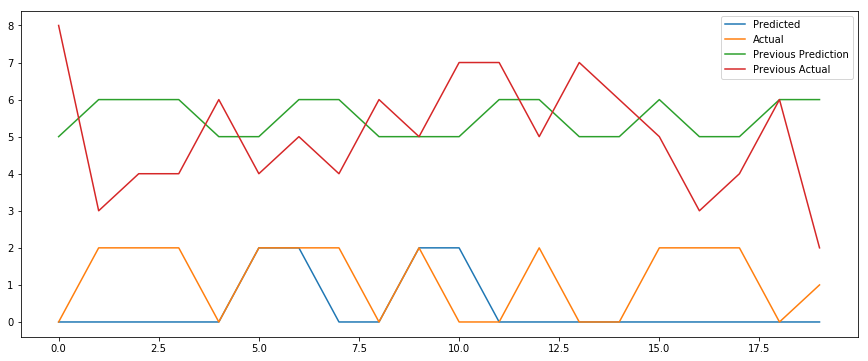

In [0]:
#ploting the comparison of the previous and new predicted and actual values
plt.plot(y_pred_svm2[0:20],label = 'Predicted')
plt.plot(y_test4[0:20].values, label = 'Actual')
plt.plot(y_pred_svm[0:20], label = 'Previous Prediction')
plt.plot(y_test2[0:20].values, label = 'Previous Actual')
plt.legend()
plt.show()

#Neural Network Using Tensorflow

Used earlystopping to prevent overfitting the model and used checkpointer to save the best model ran in the loop several time to jump out of the local mininum.

Applied paramter tuning by changing following:

* Activation function : relu, sigmoid,tanh
* Number of Dense Layers
*Number of Neurons in each layer
* Learning rate for Activatio
*Optimizer


In [0]:
#the bset classification model for 5 stars
#loading the best saved model
from keras.models import load_model
model2 = load_model(os.path.join(save_path,"best_claasification5.hdf5"))
predc = model2.predict(x_test01)
predc = np.argmax(predc,axis=1)
y_true = np.argmax(y_test01,axis=1)
score = metrics.f1_score(y_true, predc, average= "weighted")
print("F1 score: {}".format(score))

F1 score: 0.6861647117031566


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Shape: (10244, 9)
[8 7 5 ... 4 6 5]
Precision score: 0.6864267094450662
Recall score: 0.6871339320577899
F1 score: 0.6861647117031566
[[   0   22    0    0    0    0    0    0    0]
 [   0   82   27    4    0    0    0    0    0]
 [   0   41  172   79    4    1    0    0    0]
 [   0    0  106  409  194   12    0    0    0]
 [   0    0    7  157  960  366   13    0    0]
 [   0    0    1    8  278 1735  414    7    0]
 [   0    0    0    1   14  477 1946  372    1]
 [   0    0    0    0    0    8  313 1355  122]
 [   0    0    0    0    0    0    0  156  380]]
Plot of Confusion Matrix


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


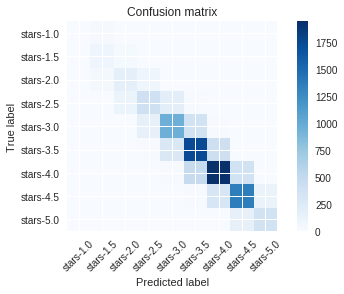

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.57      0.73      0.64       113
           2       0.55      0.58      0.56       297
           3       0.62      0.57      0.59       721
           4       0.66      0.64      0.65      1503
           5       0.67      0.71      0.69      2443
           6       0.72      0.69      0.71      2811
           7       0.72      0.75      0.73      1798
           8       0.76      0.71      0.73       536

   micro avg       0.69      0.69      0.69     10244
   macro avg       0.58      0.60      0.59     10244
weighted avg       0.69      0.69      0.69     10244



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#loading the best saved model
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
model1 = load_model(os.path.join(save_path,"best_claasification5.hdf5"))
pred2 = model1.predict(x_test01)
print("Shape: {}".format(pred2.shape))
pred2 = np.argmax(pred2,axis=1) # raw probabilities to choose class (highest probability)
print(pred2)
y_true = np.argmax(y_test01,axis=1)
score = metrics.precision_score(y_true, pred2, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, pred2, average= "weighted")
print("Recall score: {}".format(score))
score = metrics.f1_score(y_true, pred2, average= "weighted")
print("F1 score: {}".format(score))
#score = metrics.log_loss(y_true, pred2) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm = confusion_matrix(y_true,pred2)
print(cm)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm,['stars-1.0','stars-1.5','stars-2.0','stars-2.5','stars-3.0','stars-3.5','stars-4.0','stars-4.5','stars-5.0'])
plt.show()
print(classification_report(y_true,pred2))

##Boost up Performance
Output feature - review ratings categorised in 3 category high, low and medium to boost the performance of the above applied model and it significantly boosts the performance

Precision score: 0.8874015500162081
Recall score: 0.8878367825068333
F1 score: 0.8870019162678694
[[4707  438    0]
 [ 509 4109   49]
 [   0  153  279]]
Plot of Confusion Matrix


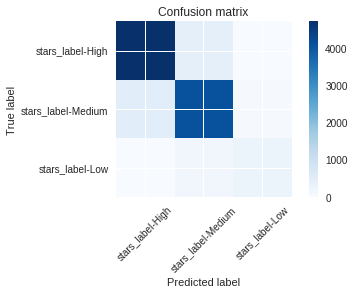

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      5145
           1       0.87      0.88      0.88      4667
           2       0.85      0.65      0.73       432

   micro avg       0.89      0.89      0.89     10244
   macro avg       0.88      0.81      0.84     10244
weighted avg       0.89      0.89      0.89     10244



In [0]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm, datasets
from keras.models import load_model


score = metrics.precision_score(y_true, pred3, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_true, pred3, average= "weighted")
print("Recall score: {}".format(score))
scoref3 = metrics.f1_score(y_true, pred3, average= "weighted")
print("F1 score: {}".format(scoref3))
#score = metrics.log_loss(y_true, pred_l_reg) #this was not working was showing y_true & y_pred both contain different classes 3 , 2.
#print("Log loss score: {}".format(score))
cm3 = confusion_matrix(y_true,pred3)
print(cm3)
print('Plot of Confusion Matrix')
plt.figure()
plot_confusion_matrix(cm3,['stars_label-High','stars_label-Medium','stars_label-Low'])
plt.show()
print(classification_report(y_true,pred3))

##Comparison

Text(0, 0.5, 'F1 score')

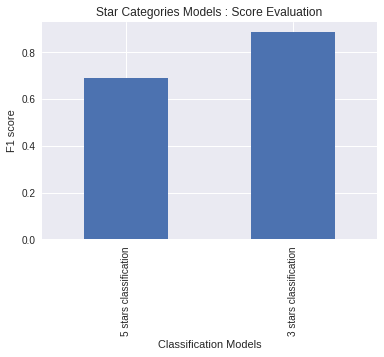

In [0]:
my_plot1 = df_comp1.plot(kind='bar',legend=None,title="Star Categories Models : Score Evaluation",)
my_plot1.set_xlabel("Classification Models")
my_plot1.set_ylabel("F1 score")

##comparing all classification models

Text(0, 0.5, 'F1 score')

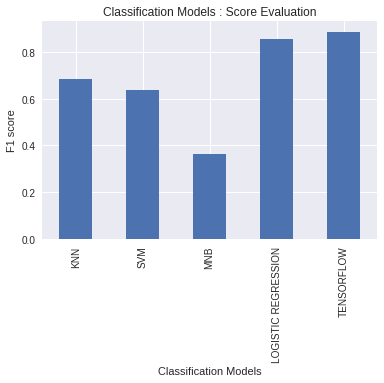

In [0]:
my_plot = df_comp.plot(kind='bar',legend=None,title="Classification Models : Score Evaluation",)
my_plot.set_xlabel("Classification Models")
my_plot.set_ylabel("F1 score")